<a href="https://colab.research.google.com/github/janasteinborn/MAT-421/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAT 421 Homework 3

Name: Jana Steinborn

## 17.4 Lagrange Polynomial Interpolation

Lagrange interpolation is a method for constructing a polynomial that passes through a given set of points.

The Lagrange polynomial is built as a sum of Lagrange basis polynomials, each weighted by the corresponding function value at a given point. These basis polynomials ensure that the final polynomial interpolates all given data points exactly.

In simple terms, this method creates a polynomial that passes through a given set of points by combining multiple smaller polynomials.

Let's consider an example where we interpolate a function given three data points.


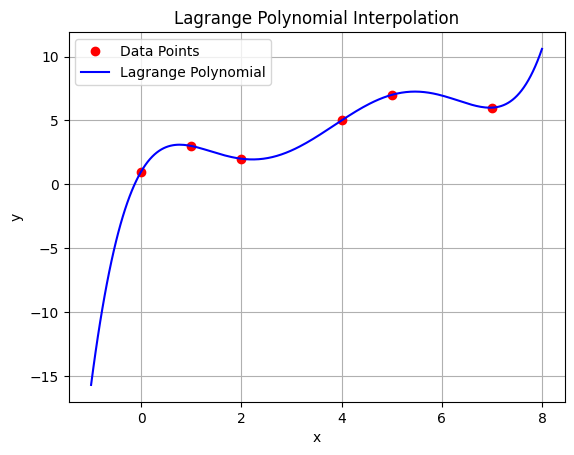

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Given data points
x_values = np.array([0, 1, 2, 4, 5, 7])
y_values = np.array([1, 3, 2, 5, 7, 6])

# Compute Lagrange polynomial
poly = lagrange(x_values, y_values)

# Generate plot data
x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 200)
y_plot = poly(x_plot)

# Plot results
plt.plot(x_values, y_values, 'ro', label="Data Points")
plt.plot(x_plot, y_plot, 'b-', label="Lagrange Polynomial")
plt.legend()
plt.title("Lagrange Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

## 17.5 Newton's Polynomial Interpolation

Newton's interpolation method builds a polynomial using divided differences. This method constructs the polynomial incrementally, using differences between function values at given points.

Instead of directly constructing the polynomial like Lagrange interpolation, Newton's method builds it step by step, adding terms based on how the function values change.

Let's implement Newton's interpolation for a set of points.


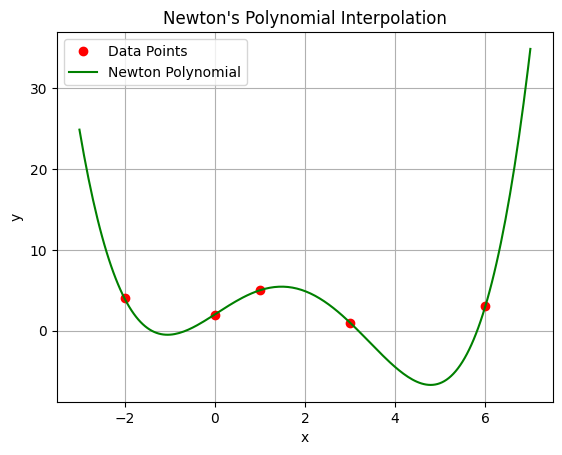

In [8]:
def divided_differences(x_values, y_values):
    n = len(y_values)
    coef = np.zeros([n, n])
    coef[:,0] = y_values

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_values[i+j] - x_values[i])

    return coef[0, :]

def newton_polynomial(x_values, coef, x):
    n = len(x_values)
    polynomial = coef[0]
    product_term = 1.0

    for i in range(1, n):
        product_term *= (x - x_values[i-1])
        polynomial += coef[i] * product_term

    return polynomial

# Given data points
x_values = np.array([-2, 0, 1, 3, 6])
y_values = np.array([4, 2, 5, 1, 3])

# Compute divided differences coefficients
coefficients = divided_differences(x_values, y_values)

# Generate plot data
x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 200)
y_plot = [newton_polynomial(x_values, coefficients, xi) for xi in x_plot]

# Plot results
plt.plot(x_values, y_values, 'ro', label="Data Points")
plt.plot(x_plot, y_plot, 'g-', label="Newton Polynomial")
plt.legend()
plt.title("Newton's Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()